In [13]:
import pickle
with open('data_transform3.pickle', 'rb') as f:
    data_transform3 = pickle.load(f)

## Segunda Transformación

In [15]:
data_transform3.head()

,AS,DOS,TRES,CUATRO,CINCO,SEIS,SIETE,OCHO,NUEVE,DIEZ,JOTA,REINA,REY,SUIT,HAND
0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0
1,0,1,0,0,2,0,0,0,0,0,1,1,0,0,1
2,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1
3,1,0,0,1,0,1,0,0,0,0,0,0,2,0,1
4,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0


In [2]:
X = data_transform3.iloc[:, 0:-1]
y = data_transform3.iloc[:, -1:]

In [3]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                    stratify=y_train_full, 
                                                    test_size=0.2,
                                                    random_state = 42)


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation



model = Sequential()
model.add(Dense(100, activation='relu', input_dim=14))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])


history = model.fit(X_train, y_train, epochs = 10, batch_size = 256, verbose=1,validation_data=(X_val, y_val))


Epoch 1/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.1267 - sparse_categorical_accuracy: 0.9684 - val_loss: 0.0063 - val_sparse_categorical_accuracy: 0.9985
Epoch 2/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0024 - sparse_categorical_accuracy: 0.9997 - val_loss: 6.5944e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 3.8038e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.6174e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/10
2500/2500 [==============================] - 3s 1ms/step - loss: 4.2296e-04 - sparse_categorical_accuracy: 0.9999 - val_loss: 8.1866e-05 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 8.0024e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 7.3495e-05 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/10
2500/2500 [==============================] - 3s 1ms

In [6]:
score = model.evaluate(X_test, y_test, batch_size = 256)
score

782/782 [==============================] - 1s 1ms/step - loss: 6.0883e-06 - sparse_categorical_accuracy: 1.0000


[6.088347618060652e-06, 1.0]

In [7]:
y_pred=model.predict(X_test).argmax(axis=1)

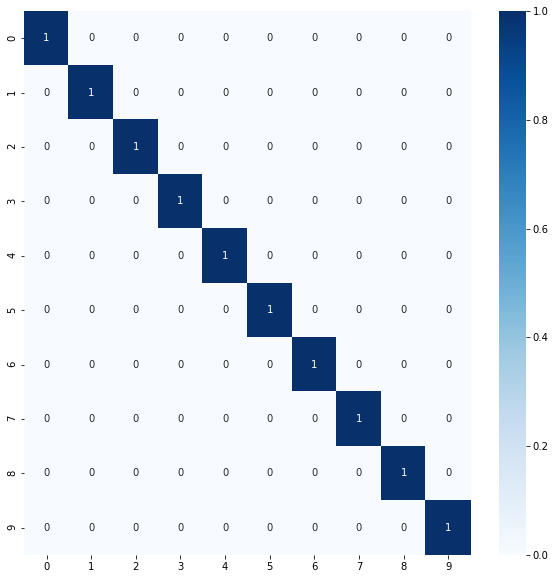

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

c_matrix = confusion_matrix(y_test, y_pred, normalize='true')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(c_matrix, annot=True, 
            cmap='Blues', ax=ax); 

## Guardar Modelo

In [12]:
model.save("my_keras_model4.h5")